# QuTiP example: Landau-Zener-Stuckelberg inteferometry

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [92]:
%matplotlib inline

In [93]:
import matplotlib.pyplot as plt

In [94]:
import numpy as np

In [95]:
from qutip import *
from qutip.ui.progressbar import TextProgressBar as ProgressBar

Landau-Zener-Stuckelberg interferometry: Steady state of a strongly driven two-level system, using the one-period propagator. 

In [96]:
# set up the parameters and start calculation
delta  = 1.0 * 2 * np.pi  # qubit sigma_x coefficient
w      = 2 * 2 * np.pi  # driving frequency
T      = 2 * np.pi / w     # driving period 
#gamma1 = 0.0
#gamma2 = 0.0

gamma1 = 0.00001        # relaxation rate
gamma2 = 0.005          # dephasing  rate

eps_list = np.linspace(-20.0, 20.0, 101) * 2 * np.pi
A_list   = np.linspace(  0.0, 20.0, 101) * 2 * np.pi

# pre-calculate the necessary operators
sx = sigmax(); sz = sigmaz(); sm = destroy(2); sn = num(2)

# collapse operators
c_op_list = [np.sqrt(gamma1) * sm, np.sqrt(gamma2) * sz]  # relaxation and dephasing

In [97]:
# ODE settings (for list-str format)
options = Options()
options.rhs_reuse = True
options.atol = 1e-6 # reduce accuracy to speed
options.rtol = 1e-5 # up the calculation a bit

In [98]:
# for function-callback style time-dependence
def hamiltonian_t(t, args):
    """ evaluate the hamiltonian at time t. """
    H0 = args[0]
    H1 = args[1]
    w  = args[2]
    return H0 + H1 * np.sin(w * t)

In [99]:
# perform the calculation for each combination of eps and A, store the result
# in a matrix
def calculate():

    p_mat = np.zeros((len(eps_list), len(A_list)))

    pbar = ProgressBar(len(eps_list))
    
    for m, eps in enumerate(eps_list):
        H0 = - delta/2.0 * sx - eps/2.0 * sz

        pbar.update(m)

        for n, A in enumerate(A_list):
            H1 = (A/2) * sz

            # function callback format
            #args = (H0, H1, w); H_td = hamiltonian_t

            # list-str format
            #args = {'w': w}; H_td = [H0, [H1, 'sin(w * t)']]

            # list-function format
            args = w; H_td = [H0, [H1, lambda t, w: np.sin(w * t)]]

            U = propagator(H_td, T, c_op_list, args, options)
            rho_ss = propagator_steadystate(U)

            p_mat[m,n] = np.real(expect(sn, rho_ss))

    return p_mat

In [100]:
p_mat = calculate()

10.9%. Run time: 302.05s. Est. time left: 00:00:41:11
20.8%. Run time: 568.80s. Est. time left: 00:00:36:06
30.7%. Run time: 811.79s. Est. time left: 00:00:30:33
40.6%. Run time: 1036.34s. Est. time left: 00:00:25:16
50.5%. Run time: 1236.33s. Est. time left: 00:00:20:12
60.4%. Run time: 1414.25s. Est. time left: 00:00:15:27
70.3%. Run time: 1583.81s. Est. time left: 00:00:11:09
80.2%. Run time: 1779.39s. Est. time left: 00:00:07:19
90.1%. Run time: 2041.90s. Est. time left: 00:00:03:44


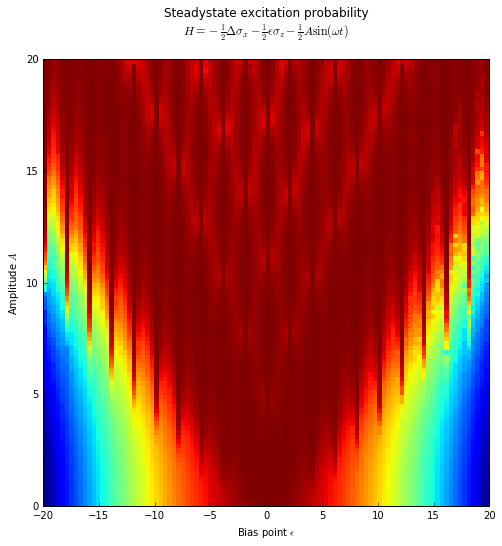

In [101]:
fig, ax = plt.subplots(figsize=(8, 8))

A_mat, eps_mat = np.meshgrid(A_list/(2*np.pi), eps_list/(2*np.pi))

ax.pcolor(eps_mat, A_mat, p_mat)
ax.set_xlabel(r'Bias point $\epsilon$')
ax.set_ylabel(r'Amplitude $A$')
ax.set_title("Steadystate excitation probability\n" +
             r'$H = -\frac{1}{2}\Delta\sigma_x -\frac{1}{2}\epsilon\sigma_z - \frac{1}{2}A\sin(\omega t)$' + "\n");

## Versions

In [102]:
from qutip.ipynbtools import version_table

version_table()

KeyError: 'cpus'